# Introduction
From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

<img src="../assets/bricks.jpg">

# Import Statements

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/colors.csv")

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [137]:
num_unique = df['rgb'].nunique()
print(f"There are {num_unique} unique colors of bricks.")

There are 124 unique colors of bricks.


In [138]:
opaque, transparent = df.groupby("is_trans").count()['rgb'][0], df.groupby("is_trans").count()['rgb'][1]
print(f"There are {opaque} opaque bricks.")
print(f"There are {transparent} transparent bricks.")

There are 107 opaque bricks.
There are 28 transparent bricks.


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [139]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets ###

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [140]:
sets_df = pd.read_csv("../data/sets.csv")

In [141]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [142]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [143]:
index_earliest_year = sets_df["year"].idxmin()
earliest_year = sets_df["year"][index_earliest_year]
earliest_set_name = sets_df["name"][index_earliest_year]
print(f'The first Lego set was released in {earliest_year} and was called "{earliest_set_name}".')

The first Lego set was released in 1949 and was called "Extra-Large Gift Set (ABB)".


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [144]:
number_sets_earliest_year = sets_df[sets_df['year'] == earliest_year].count()[0]
print(f"LEGO sold {number_sets_earliest_year} sets in {earliest_year}.")

LEGO sold 5 sets in 1949.


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [145]:
sets_df.sort_values("num_parts", ascending=False)[["name", "num_parts"]].head()

,name,num_parts
15004,The Ultimate Battle for Chima,9987
11183,UCS Millennium Falcon,7541
10551,Hogwarts Castle,6020
295,Taj Mahal,5923
221,Taj Mahal,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [146]:
sets_released_1955 = sets_df.groupby("year").count()["set_num"][1955]
sets_released_2019 = sets_df.groupby("year").count()["set_num"][2019]
print(f"The number of sets released in 1955 is {sets_released_1955}, and the number of sets released in 2019 is {sets_released_2019}.")

The number of sets released in 1955 is 28, and the number of sets released in 2019 is 840.


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [147]:
grouped_by_year = sets_df.groupby("year").count()["set_num"][:-2]
grouped_by_year.tail()

C:\Users\Garrett\AppData\Local\Temp\ipykernel_30620\3110358486.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  grouped_by_year = sets_df.groupby("year").count()["set_num"][:-2]


year
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, dtype: int64

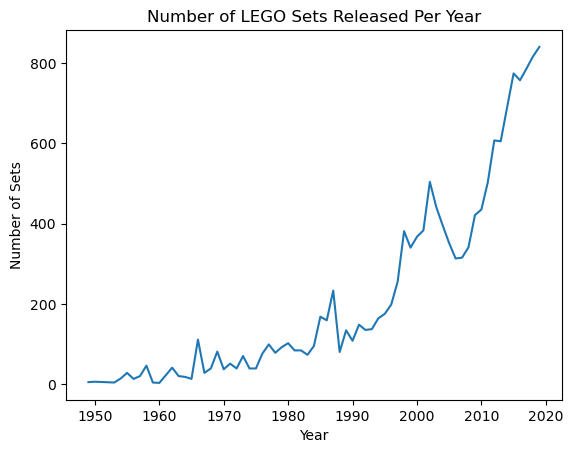

In [148]:
plt.title("Number of LEGO Sets Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.plot(grouped_by_year)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [149]:
themes_by_year = sets_df.groupby('year').agg({
    'theme_id': pd.Series.nunique
})
themes_by_year.rename(columns= {'theme_id':'nr_themes'}, inplace=True)

In [150]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

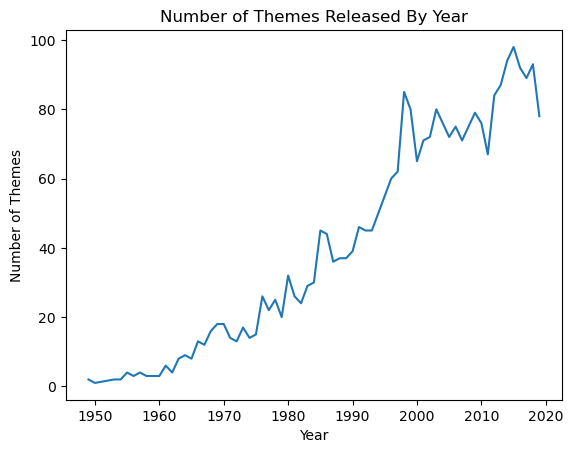

In [151]:
plt.title("Number of Themes Released By Year")
plt.xlabel("Year")
plt.ylabel("Number of Themes")
plt.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

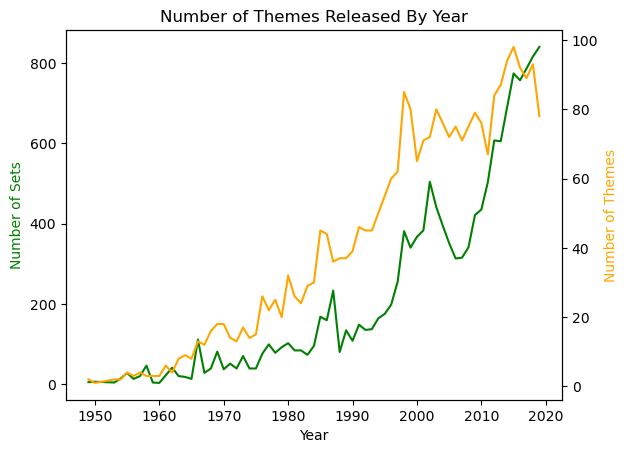

In [152]:
plt.title("Number of Themes Released By Year")
plt.xlabel("Year")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(grouped_by_year, color='g')
ax2.plot(themes_by_year[:-2], color='orange')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='orange')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [153]:
pd.options.display.float_format = '{:,.0f}'.format
parts_per_set = sets_df.groupby("year").agg({
    "num_parts": pd.Series.mean
})[:-2]
parts_per_set.rename(columns= {'num_parts':'avg_num_parts'}, inplace=True)
parts_per_set.tail()

,avg_num_parts
year,
2015,191
2016,210
2017,222
2018,214
2019,208


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

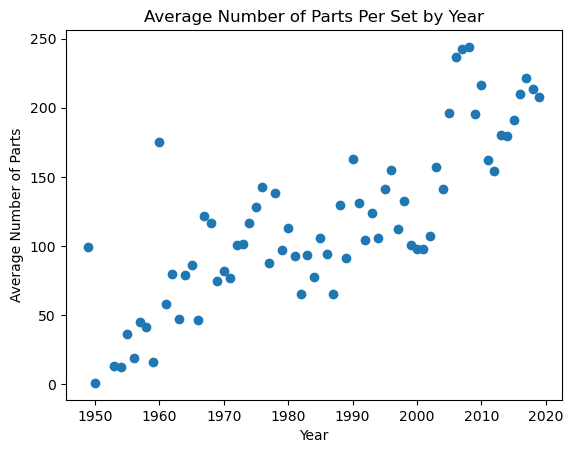

In [154]:
plt.title("Average Number of Parts Per Set by Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Parts")
plt.scatter(parts_per_set.index, parts_per_set['avg_num_parts'])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [155]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count.iloc[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [156]:
themes = pd.read_csv("../data/themes.csv")
star_wars_ids = themes[themes['name'] == "Star Wars"]['id']

In [157]:
for id in star_wars_ids.tolist():
    print(sets_df[sets_df['theme_id'] == id])

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
           set_num                                              

In [158]:
set_theme_count = pd.DataFrame({
    'id':set_theme_count.index,
    'set_count':set_theme_count.values
})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


### Merging (i.e., Combining) DataFrames based on a Key


In [159]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

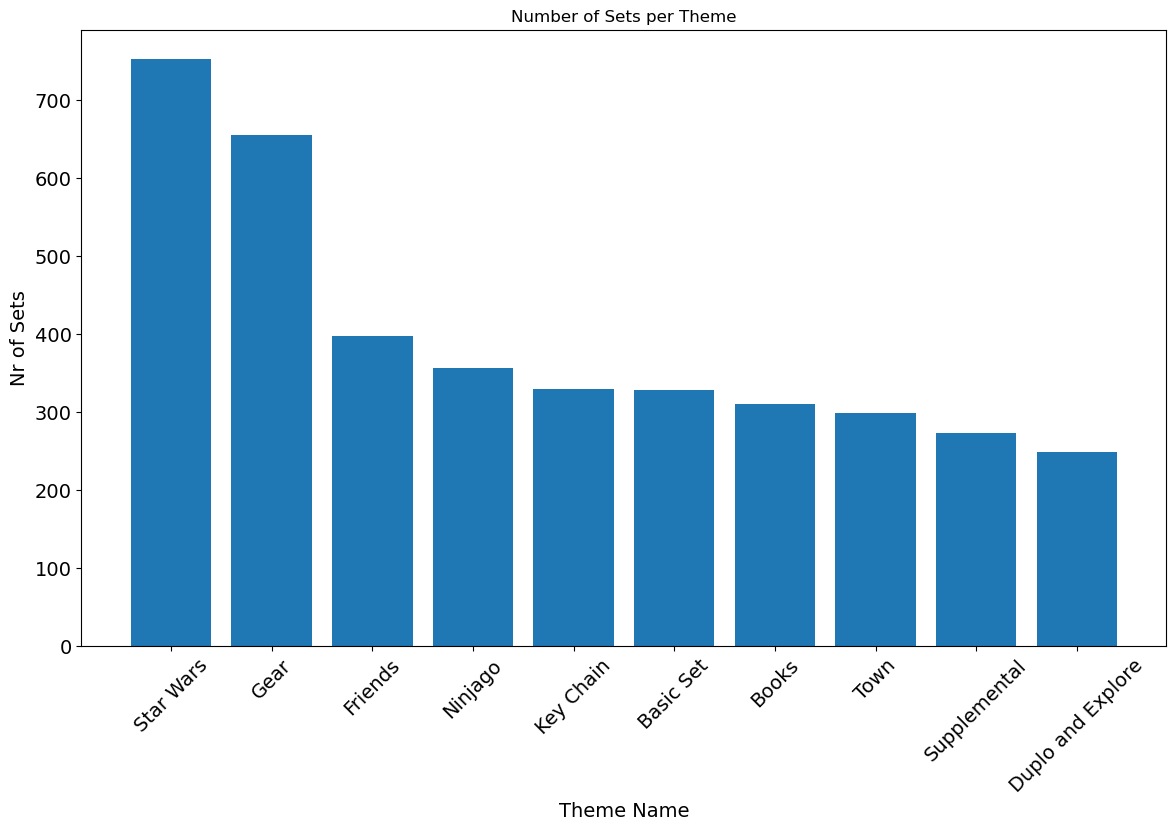

In [160]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Number of Sets per Theme")
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])